In [1]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
non_perturbed_deck = 'standard'
decks = [
    'batman_joker',
    'captain_america',
    'adversarial_standard',
    'adversarial_batman_joker',
    'adversarial_captain_america'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90]
FONT_SIZE=18
TICK_FONT_SIZE=12
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [3]:
def get_nsl_results(net_type, deck):
    struc_unstruc = 'structured_test_data'
    acc_metric = 'accuracy'
        
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []
    
    # get standard
    np_0 = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/standard.json').read())
    acc.append(np_0['noise_pct_0'][acc_metric]['mean'])
    acc_stds.append(np_0['noise_pct_0'][acc_metric]['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/'+struc_unstruc+'/'+net_type+'/'+deck+'.json').read())    
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)][acc_metric]['mean'])
        acc_stds.append(np_res['noise_pct_'+str(n)][acc_metric]['std_err'])
    return acc, acc_stds

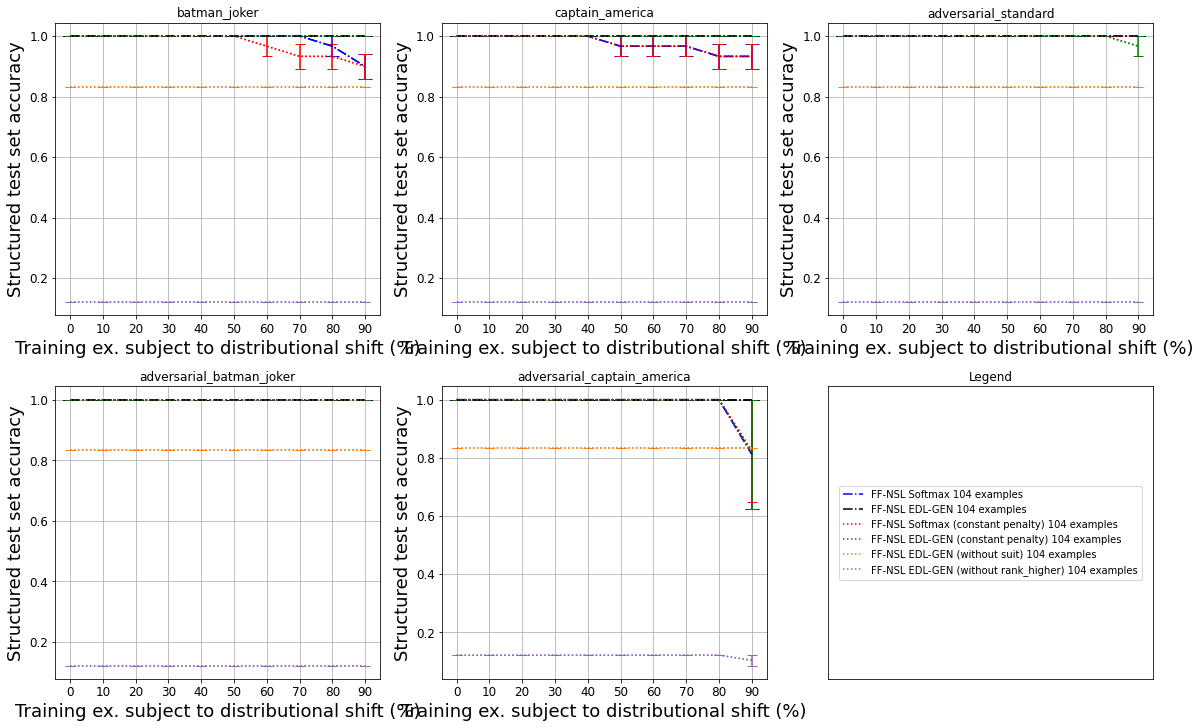

In [6]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])

axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]


nps_x = [0]+noise_pcts
for i in range(5):
  
    # Softmax
    softmax, softmax_err = get_nsl_results('softmax', decks[i])
    axes[i].plot(nps_x, softmax, label = "FF-NSL Softmax 104 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, softmax, yerr=softmax_err, color="b", capsize=7,linestyle='-.')
    
    # EDL-GEN
    edl_gen, edl_gen_err = get_nsl_results('edl_gen', decks[i])
    axes[i].plot(nps_x, edl_gen, label = "FF-NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, edl_gen, yerr=edl_gen_err, color="k", capsize=7,linestyle='-.')
    
    # Constant
    constant_softmax, constant_err = get_nsl_results('constant_softmax', decks[i])
    axes[i].plot(nps_x, constant_softmax, label = "FF-NSL Softmax (constant penalty) 104 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, constant_softmax, yerr=constant_err, color="r", capsize=5,linestyle=':')
    
    constant_edl_gen, constant_err = get_nsl_results('constant_edl_gen', decks[i])
    axes[i].plot(nps_x, constant_edl_gen, label = "FF-NSL EDL-GEN (constant penalty) 104 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, constant_edl_gen, yerr=constant_err, color="g", capsize=5,linestyle=':')
    
    
    # Without rank higher
    without_rh, without_rh_err = get_nsl_results('without_suit', decks[i])
    axes[i].plot(nps_x, without_rh, label = "FF-NSL EDL-GEN (without suit) 104 examples", color="tab:orange", linestyle=':')
    axes[i].errorbar(nps_x, without_rh, yerr=without_rh_err, color="tab:orange", capsize=5,linestyle=':')
    
    # Without rank higher
    without_rh, without_rh_err = get_nsl_results('without_rank_higher', decks[i])
    axes[i].plot(nps_x, without_rh, label = "FF-NSL EDL-GEN (without rank_higher) 104 examples", color="tab:purple", linestyle=':')
    axes[i].errorbar(nps_x, without_rh, yerr=without_rh_err, color="tab:purple", capsize=5,linestyle=':')
    
    
    
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training ex. subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Structured test set accuracy', fontsize=FONT_SIZE)
    axes[i].grid(True)
    axes[i].set_title(decks[i])

# Legend
f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
f2_ax6.get_xaxis().set_visible(False)
f2_ax6.get_yaxis().set_visible(False)
f2_ax6.set_title('Legend')
    
plt.show()